<a href="https://colab.research.google.com/github/shubham2721/Data-Analysis-With-Python/blob/main/Health_care_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import essential Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
health_df = pd.read_csv('/content/health.csv')

In [ ]:
health_df.shape

(479688, 24)

In [ ]:
health_df.columns

Index(['   ', 'AGE', 'SEX', 'CASTE_NAME', 'CATEGORY_CODE', 'CATEGORY_NAME',
       'SURGERY_CODE', 'SURGERY', 'VILLAGE', 'MANDAL_NAME', 'DISTRICT_NAME',
       'PREAUTH_DATE', 'PREAUTH_AMT', 'CLAIM_DATE', 'CLAIM_AMOUNT',
       'HOSP_NAME', 'HOSP_TYPE', 'HOSP_LOCATION', 'HOSP_DISTRICT',
       'SURGERY_DATE', 'DISCHARGE_DATE', 'Mortality Y / N', 'MORTALITY_DATE',
       'SRC_REGISTRATION'],
      dtype='object')

In [ ]:
health_df

,,AGE,SEX,CASTE_NAME,CATEGORY_CODE,CATEGORY_NAME,SURGERY_CODE,SURGERY,VILLAGE,MANDAL_NAME,DISTRICT_NAME,PREAUTH_DATE,PREAUTH_AMT,CLAIM_DATE,CLAIM_AMOUNT,HOSP_NAME,HOSP_TYPE,HOSP_LOCATION,HOSP_DISTRICT,SURGERY_DATE,DISCHARGE_DATE,Mortality Y / N,MORTALITY_DATE,SRC_REGISTRATION
0,1,56,Female,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Lolugu,Ponduru,Srikakulam,03/08/2013 20:38:48,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,06/08/2013 00:00:00,07/09/2013 00:00:00,NO,NaN,D
1,2,37,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Borivanka,Kaviti,Srikakulam,06/08/2013 07:26:15,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,08/08/2013 00:00:00,09/09/2013 00:00:00,NO,NaN,D
2,3,50,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Kapasakuddi,Kaviti,Srikakulam,09/08/2013 18:30:50,12500,22/03/2017 20:25:18,11500,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,15/08/2013 00:00:00,18/10/2013 00:00:00,NO,NaN,D
3,4,45,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Telikipenta,Sarubujjili,Srikakulam,24/08/2013 19:37:41,12500,22/03/2017 20:25:18,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,24/08/2013 00:00:00,27/09/2013 00:00:00,NO,NaN,D
4,5,54,Male,BC,M6,NEPHROLOGY,M6.5,Maintenance Hemodialysis For Crf,Thandemvalasa,Srikakulam,Srikakulam,28/08/2013 17:03:07,12500,22/03/2017 20:25:19,11000,"Rims Govt. General Hospital, Srikakulam",G,SRIKAKULAM,Srikakulam,31/08/2013 00:00:00,02/10/2013 00:00:00,NO,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479683,479684,22,Female,BC,S4,GYNAECOLOGY AND OBSTETRICS SURGERY,S4.2.2,Laparoscopic Cystectomy,Kalayakagollu,Butchireddipalem,Nellore,18/11/2017 22:36:49,24910,30/12/2017 21:34:34,24910,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,15/11/2017 00:00:00,19/11/2017 00:00:00,NO,NaN,D
479684,479685,60,Male,BC,S12,MEDICAL ONCOLOGY,S12.16.2.2,Chemotherapy for Non Hodgkin Lymphoma with R ...,Rajupalem,Kothapatnam,Prakasam,17/11/2017 17:02:09,45910,30/12/2017 21:37:20,45910,Manipal Health Enterprises PVT LTD,C,GUNTUR,Guntur,17/11/2017 00:00:00,18/11/2017 00:00:00,NO,NaN,D
479685,479686,38,Male,OC,S15,POLY TRAUMA,S15.1.1,Surgical Correction Of Longbone Fracture,Yeturu,Chejerla,Nellore,18/11/2017 06:36:11,30000,30/12/2017 21:37:19,30000,Krishna Institute of Medical Sciences Bollinen...,C,NELLORE,Nellore,16/11/2017 00:00:00,18/11/2017 00:00:00,NO,NaN,D
479686,479687,59,Male,OC,S3,OPHTHALMOLOGY SURGERY,S3.3.1,Vitrectomy,Ganapavaram,Ganapavaram,West Godavari,18/11/2017 09:17:02,23020,30/12/2017 21:37:23,23020,Sankar Eye Hospital,C,GUNTUR,Guntur,16/11/2017 00:00:00,18/11/2017 00:00:00,NO,NaN,D


In [ ]:
data = {
    'A':['A', 'A', 'B', 'C', 'C'], 
    'B':['B1:', 'B2', 'B3', 'B4', 'B5'], 
    'C':['A1', 'A1', 'C3', 'C1', 'C2'], 
    'D':['D1', 'D2', 'D3:', 'D4', 'D5'], 
    'E':['E1', 'E2', 'E3', 'E4', 'E5'] }
  
# Convert the dictionary into DataFrame 
df_2 = pd.DataFrame(data)

In [ ]:
df_2

,A,B,C,D,E
0,A,B1:,A1,D1,E1
1,A,B2,A1,D2,E2
2,B,B3,C3,D3:,E3
3,C,B4,C1,D4,E4
4,C,B5,C2,D5,E5


In [ ]:
df_2['A'].unique()

array(['A', 'B', 'C'], dtype=object)

In [ ]:
for i in df_2['A'].unique():
    print("District: {}\n Disease and Count: {}\n '============'\n".format(i,df_2[df_2['A']==i]['C'].value_counts()))


District: A
 Disease and Count: A1    2
Name: C, dtype: int64
 '============'

District: B
 Disease and Count: C3    1
Name: C, dtype: int64
 '============'

District: C
 Disease and Count: C2    1
C1    1
Name: C, dtype: int64
 '============'



## **Most common surgery and count per District**

In [ ]:
lst = []
lst2 = [] 
for i in health_df['DISTRICT_NAME'].unique():
  print("District Name: {} \nDisease name and count: {}\n ===================". format(i,health_df[health_df['DISTRICT_NAME'] == i]['SURGERY'].value_counts().head(1)))
  lst.append(i)
  lst2.append(str(health_df[health_df['DISTRICT_NAME'] == i]['SURGERY'].value_counts().head(1)))

District Name: Srikakulam 
Disease name and count: Maintenance Hemodialysis For Crf    3970
Name: SURGERY, dtype: int64
District Name: Kurnool 
Disease name and count: Surgical Correction Of Longbone Fracture    2943
Name: SURGERY, dtype: int64
District Name: Vizianagaram 
Disease name and count: Surgical Correction Of Longbone Fracture    2754
Name: SURGERY, dtype: int64
District Name: Guntur 
Disease name and count: Surgical Correction Of Longbone Fracture    5259
Name: SURGERY, dtype: int64
District Name: Vishakhapatnam 
Disease name and count: Maintenance Hemodialysis For Crf    5270
Name: SURGERY, dtype: int64
District Name: West Godavari 
Disease name and count: Maintenance Hemodialysis For Crf    5478
Name: SURGERY, dtype: int64
District Name: Krishna 
Disease name and count: Maintenance Hemodialysis For Crf    6026
Name: SURGERY, dtype: int64
District Name: East Godavari 
Disease name and count: Surgical Correction Of Longbone Fracture    6998
Name: SURGERY, dtype: int64
Distri

In [ ]:
# converting the above into a dataframe for plotting graphs
Dis_common_sur = pd.DataFrame(lst)
dis_sur = pd.DataFrame(lst2)

In [ ]:
# as this data frame contains unusual strings
dis_sur = dis_sur[0].str.split('\n', 1 , expand =True)

In [ ]:
# this /d means split when digits encounter and + to include that too
dis_sur = dis_sur[0].str.split('(\d+)',1 , expand =True)

In [ ]:
# for renaming the columns
dis_sur.columns = ['Diseases', 'Counts', 2]

In [ ]:
dis_sur.drop(columns=2, inplace = True)

In [ ]:
# now we will add two dataframe together
Dis_common_sur1 = pd.concat([Dis_common_sur, dis_sur],axis = 1) # by default axis is 0 rows + rows

In [ ]:
Dis_common_sur1

,0,Diseases,Counts
0,Srikakulam,Maintenance Hemodialysis For Crf,3970
1,Kurnool,Surgical Correction Of Longbone Fracture,2943
2,Vizianagaram,Surgical Correction Of Longbone Fracture,2754
3,Guntur,Surgical Correction Of Longbone Fracture,5259
4,Vishakhapatnam,Maintenance Hemodialysis For Crf,5270
5,West Godavari,Maintenance Hemodialysis For Crf,5478
6,Krishna,Maintenance Hemodialysis For Crf,6026
7,East Godavari,Surgical Correction Of Longbone Fracture,6998
8,Prakasam,Maintenance Hemodialysis For Crf,6215
9,Nellore,Maintenance Hemodialysis For Crf,10824


In [ ]:
Dis_common_sur1.columns = ['district', 'diseases', 'counts'] 

In [ ]:
Dis_common_sur1['counts'] = pd.to_numeric(Dis_common_sur1['counts'])

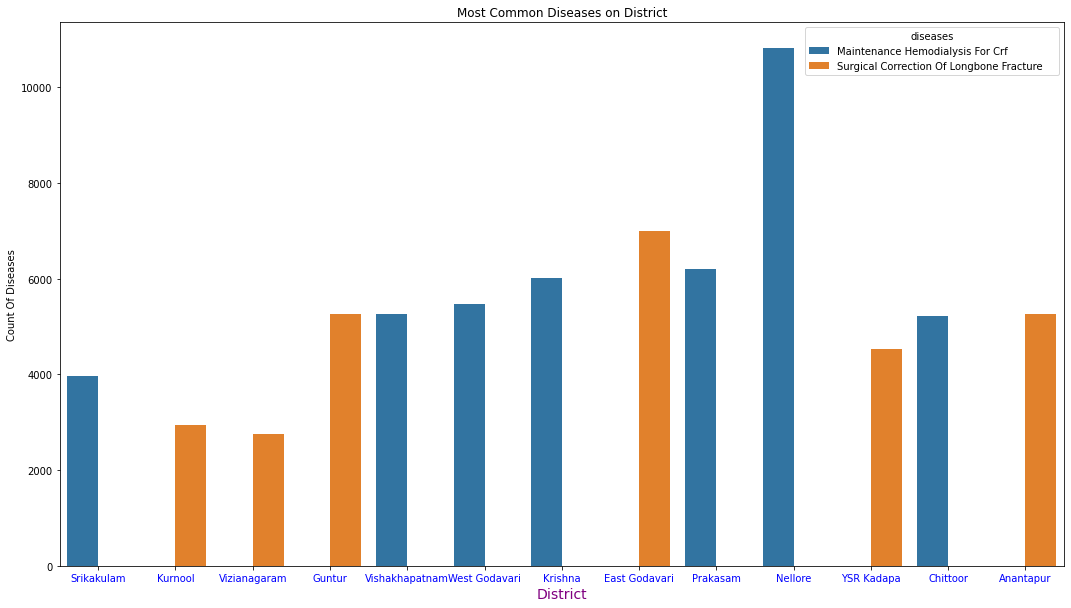

In [ ]:
plt.figure(figsize = (18,10))
graph = sns.barplot(x = Dis_common_sur1['district'],y = Dis_common_sur1['counts'], hue = Dis_common_sur1['diseases'])
graph.set(xlabel = 'Ditricts', ylabel = 'Count Of Diseases', title = 'Most Common Diseases on District')
graph.set_xticklabels(Dis_common_sur1['district'], color ='blue') #xtickes is for xaxis parameters
graph.set_xlabel('District', color = 'purple', size = 14);# xlabel = title of x-axis